## Import necessary packages

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl

import cyclum.tuning
import cyclum.models
from cyclum import writer

from cyclum.hdfrw import hdf2mat, mat2hdf

Using TensorFlow backend.


In [3]:
df = hdf2mat('/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSE125416-regular.h5')
print(f"Running on {df.shape[0]} cells and {df.shape[1]} genes.")

Running on 12280 cells and 33694 genes.


In [4]:
model = cyclum.tuning.CyclumAutoTune(df.values, max_linear_dims=5, 
                                     epochs=60, rate=2e-4, verbose=20,
                                     encoder_width=[30, 20], nonlinear_reg=1e-6)

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch: 20/60, loss:  0.4429, time elapsed:  125.81s, time left:  251.63s
epoch: 40/60, loss:  0.4429, time elapsed:  232.34s, time left:  116.17s
epoch: 60/60, loss:  0.4428, time elapsed:  338.81s, time left:  0.00s
[0.4428003714604952]
[0.443453290335707, 0.4410518937281732, 0.4389186967544678, 0.4368899835183356, 0.4357768966760317, 0.4347154649722782]
    1 linear dimensions...
epoch: 20/60, loss:  0.4407, time elapsed:  108.81s, time left:  217.62s
epoch: 40/60, loss:  0.4406, time elapsed:  217.32s, time left:  108.66s
epoch: 60/60, loss:  0.4405, time elapsed:  325.63s, time left:  0.00s
[0.4428003714604952, 0.4405111783878811]
[0.443453290335707, 0.4410518937281732, 0.4389186967544678, 0.4368899835183356, 0.4357768966760317, 0.4347154649722782]

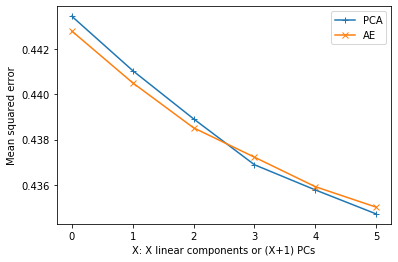

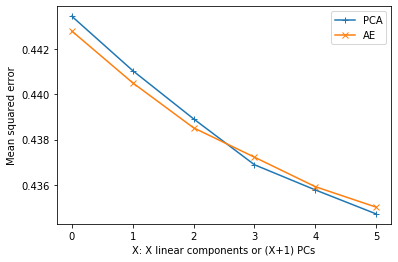

In [5]:
model.show_elbow()

In [6]:
model.train(df.values, epochs=60, rate=1e-4, verbose=20)

epoch: 20/60, loss:  0.4430, time elapsed:  107.03s, time left:  214.06s
epoch: 40/60, loss:  0.4427, time elapsed:  213.47s, time left:  106.73s
epoch: 60/60, loss:  0.4427, time elapsed:  320.05s, time left:  0.00s


In [7]:
pseudotime = np.vstack([model.predict_pseudotime(df.values[0:4000, ]),
                        model.predict_pseudotime(df.values[4000:8000, ]),
                        model.predict_pseudotime(df.values[8000:12280, ])]
                       )

In [8]:
from cyclum.hdfrw import hdf2mat, mat2hdf

mat2hdf(pseudotime, "/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSE125416-regular-pseudotime-param.h5")

In [9]:
layer = model.model.get_layer('decoder_out')
weights = layer.get_weights()[0]
mat2hdf(weights, "/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSE125416-regular-weight-param.h5")

In [10]:
weights
pseudotime.shape


(12280, 1)